In [41]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.svm import LinearSVC
%matplotlib inline

def Database():
    """compile data sets into a data library, the output will be a DataFrame"""
    data_1 = pd.read_excel('data/Flash Point and Cetane Number Predictions for Fuel Compounds.xls', skiprows=3)
    data = data_1[['Name','Family', 'FP Exp.', 'CN Exp.']]
    result_1 = data.drop(index=0)
    result_1.reset_index(drop=True, inplace=True)
    data_2 = pd.read_excel('data/Flash Point and Cetane Number Predictions for Fuel Compounds.xls', skiprows=4)
    result_2 = data_2.loc[: , '-H': 'aaCa']
    result = pd.concat([result_1, result_2], axis=1)
    return result

## data clean

In [42]:
df = Database()
train, test = train_test_split(df, test_size=0.1)
a = train[train.columns[4:]]
X_train = a.mask(a>0, 1)
y_train = train['Family']

b = test[test.columns[4:]]
X_test = b.mask(b>0, 1)
y_test = test['Family']

In [43]:
train.head()

,Name,Family,FP Exp.,CN Exp.,-H,-CH3,-CH2-,>CH-,>C<,=CH2,...,-OH (phenol),-O-,(-O-)R,aOa,>C=O,(>C=O)R,-CHO,-COOH,-COO-,aaCa
85,"hexane-2,5-diol",Alcohols,374.0,NaN,14,2,2,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1095,4(S)-ethyltetradecane,Paraffins,NaN,NaN,34,3,12,1,0,0,...,0,0,0,0,0,0,0,0,0,0
899,"(7R,8S)-diethyltetradecane",Paraffins,NaN,67.0,38,4,12,2,0,0,...,0,0,0,0,0,0,0,0,0,0
826,hept-1-yne,Olefins,NaN,22.0,12,1,4,0,0,0,...,0,0,0,0,0,0,0,0,0,0
914,2-methyldodecane,Paraffins,NaN,NaN,28,3,9,1,0,0,...,0,0,0,0,0,0,0,0,0,0


## knn

In [44]:
# define knn model
k = 5
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
train_pred = knn.predict(X_train)

In [45]:
# print accuracy 
accu = metrics.accuracy_score(y_test, y_pred)
accu

0.98275862068965514

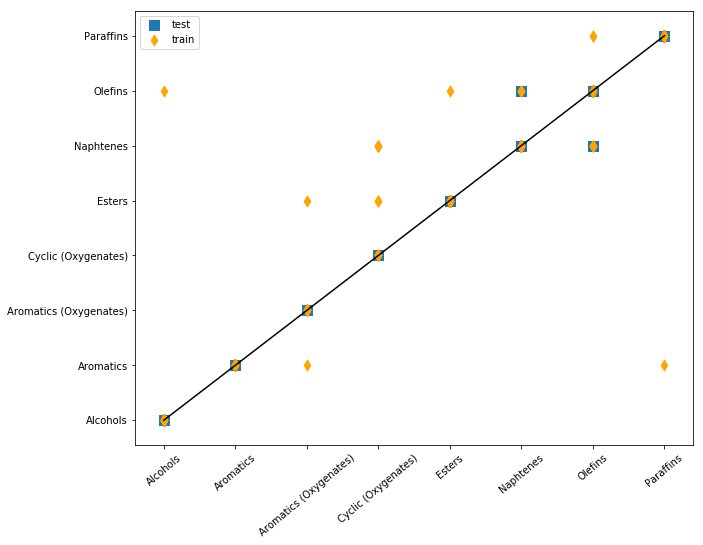

In [46]:
# plot the train and test set
plt.figure(figsize=(10,8))
plt.scatter(y_test, y_pred, marker='s', s=100, label='test')
plt.scatter(y_train, train_pred, marker='d', s=60,c='orange', label='train')
plt.plot([0,7], [0,7], color='k')
plt.xticks(rotation='40')
plt.legend()

### define functions

In [47]:
def train_knn(k, X_train, y_train):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    return knn

In [48]:
def test_knn(k, X_train, y_train, X_test, y_test):
    knn = train_knn(k, X_train, y_train)
    y_pred = knn.predict(X_test)
    train_pred = knn.predict(X_train)
    print('Accuracy = ', metrics.accuracy_score(y_test, y_pred))
    plt.figure(figsize=(10,8))
    plt.scatter(y_test, y_pred, marker='s', s=100, label='test')
    plt.scatter(y_train, train_pred, marker='d', s=60,c='orange', label='train')
    plt.plot([0,7], [0,7], color='k')
    plt.xticks(rotation='40')
    plt.legend()
    return

In [54]:
def predict_family_knn(k, X_train, y_train, X):
    knn = train_knn(k, X_train, y_train)
    y_pred = knn.predict(X)
    return y_pred

In [55]:
train_knn(5, X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

Accuracy =  0.98275862069


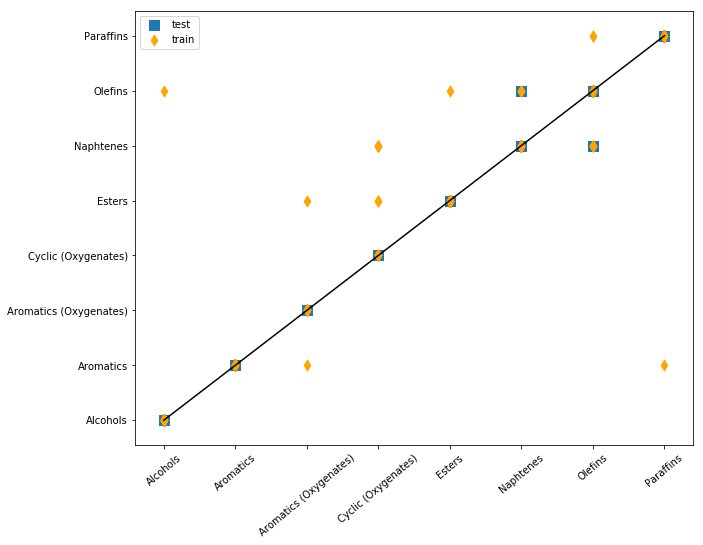

In [56]:
test_knn(5, X_train, y_train, X_test, y_test)

In [57]:
X=X_train.iloc[0:2,:]
X

,-H,-CH3,-CH2-,>CH-,>C<,=CH2,=CH-,=C<,#CH,#C-,...,-OH (phenol),-O-,(-O-)R,aOa,>C=O,(>C=O)R,-CHO,-COOH,-COO-,aaCa
85,1,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1095,1,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [58]:
predict_family_knn(k, X_train, y_train, X)

array(['Alcohols', 'Paraffins'], dtype=object)